<a href="https://colab.research.google.com/github/MeenTers/Project/blob/main/Compare_view_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Function 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torch import nn, load, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models
from torchvision.models.vgg import model_urls
from os import path, listdir
model_urls['vgg19'] = model_urls['vgg19'].replace('https://', 'http://')

In [3]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
import pandas as pd

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# VGG model

In [5]:
class VGG:
	def __init__(self):
		model = models.vgg19(pretrained=True, progress=True)
		model.classifier = nn.Sequential(*list(model.classifier.children())[:3])
		self.model = model.cuda().eval()

	def __call__(self, x):
		return self.model(x)

In [6]:
vgg = VGG()

Downloading: "http://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

# Create Features Extraction Function

In [7]:
def get_features(model, loader):
    features = []
    with torch.no_grad():
        for batch, _ in tqdm(loader):
            if torch.cuda.is_available():
                batch = batch.cuda()
            b_features = model(batch).detach().cpu().numpy()
            for f in b_features:
                features.append(f)

    return features

# Create Loading the data Function

In [8]:
def get_dataset(images_path):
  transform = transforms.Compose([
    transforms.Resize(size=32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  dataset = datasets.ImageFolder(images_path, transform=transform)
  loader = utils.data.DataLoader(dataset, batch_size=100, shuffle=False, num_workers=1, pin_memory=True)
  return dataset, loader

# Install Font TH-SARABUN

In [9]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [10]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

# Create Compute Distance Function

In [11]:
def get_euclidean(base_car,diff_view):
    A = []
    for i in range(len(diff_view)):
        x = distance.euclidean(base_car[0],diff_view[i])
        A.append(x)
    return(A)

# Create Function Show Image

In [12]:
def show_img(img1,img2,img3,img4,text1,text2,text3,text4,distance):
  # create figure
  fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
  rows = 2
  columns = 2
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)
  # showing image
  plt.imshow(img1)
  plt.axis('off')
  plt.title(text1)

  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)  
  # showing image
  plt.imshow(img2)
  plt.axis('off')
  plt.title(text2)
  plt.text(200,450,'Distance = ',fontsize = 15)
  plt.text(375, 450,round(distance[0],3), fontsize =15,
          bbox = dict(facecolor = 'red', alpha = 0.5))
  # Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)
  # showing image
  plt.imshow(img3)
  plt.axis('off')
  plt.title(text3)
  plt.text(140,400,'Distance = ',fontsize = 15)
  plt.text(300, 400,round(distance[1],3), fontsize =15,
          bbox = dict(facecolor = 'red', alpha = 0.5))
  # Adds a subplot at the 4th position
  fig.add_subplot(rows, columns, 4)
  # showing image
  plt.imshow(img4)
  plt.axis('off')
  plt.title(text4)
  plt.text(200,400,'Distance = ',fontsize = 15)
  plt.text(360, 400,round(distance[2],3), fontsize =15,
          bbox = dict(facecolor = 'red', alpha = 0.5))

In [13]:
def show_img2(img1,img2,img3,img4,text1,text2,text3,text4,distance):
  # create figure
  fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
  rows = 2
  columns = 2
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)
  # showing image
  plt.imshow(img1)
  plt.axis('off')
  plt.title(text1)

  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)  
  # showing image
  plt.imshow(img2)
  plt.axis('off')
  plt.title(text2)
  plt.text(200,450,'Distance = ',fontsize = 15)
  plt.text(375, 450,round(distance[3],3), fontsize =15,
          bbox = dict(facecolor = 'red', alpha = 0.5))
  # Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)
  # showing image
  plt.imshow(img3)
  plt.axis('off')
  plt.title(text3)
  plt.text(140,400,'Distance = ',fontsize = 15)
  plt.text(300, 400,round(distance[4],3), fontsize =15,
          bbox = dict(facecolor = 'red', alpha = 0.5))
  # Adds a subplot at the 4th position
  fig.add_subplot(rows, columns, 4)
  # showing image
  plt.imshow(img4)
  plt.axis('off')
  plt.title(text4)
  plt.text(200,400,'Distance = ',fontsize = 15)
  plt.text(360, 400,round(distance[5],3), fontsize =15,
          bbox = dict(facecolor = 'red', alpha = 0.5))

# เปรียบเทียบด้านหน้ารถยนต์

### ID1

In [14]:
img1f  = cv2.imread(r'/content/drive/MyDrive/3D_Model/Base_car/ID1/ID1/ID1F.png')
img1_1 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID1/ID1/ID1_1.png')
img1_2 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID1/ID1/ID1_2.png')
img1_3 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID1/ID1/ID1_3.png')
img1_4 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID1/ID1/ID1BC.png')
img1_5 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID1/ID1/ID1BL.png')
img1_6 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID1/ID1/ID1BR.png')

In [15]:
car1_dataset , car1_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Base_car/ID1')
dmg1_dataset , dmg1_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Car_view/ID1')

In [16]:
id1b = get_features(vgg,car1_loader)
id1v = get_features(vgg,dmg1_loader)

100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


In [17]:
id1 = get_euclidean(id1b,id1v)
id1

[63.432159423828125,
 18.655353546142578,
 11.561168670654297,
 40.26364517211914,
 23.708545684814453,
 38.29777908325195]

In [18]:
tx1 = 'หน้ารถยนต์ปกติ'
tx2 = 'ซูมหน้ารถเข้า 1 ระดับ'
tx3 = 'กระจกมองข้างเสียหาย'
tx4 = 'เปรียบเทียบหน้ารถยนต์คันอื่น'
tx5 = 'โดนชนตรงกลางรถ'
tx6 = 'โดนชนทางด้านซ้าย'
tx7 = 'โดนชนทางด้านขวา'

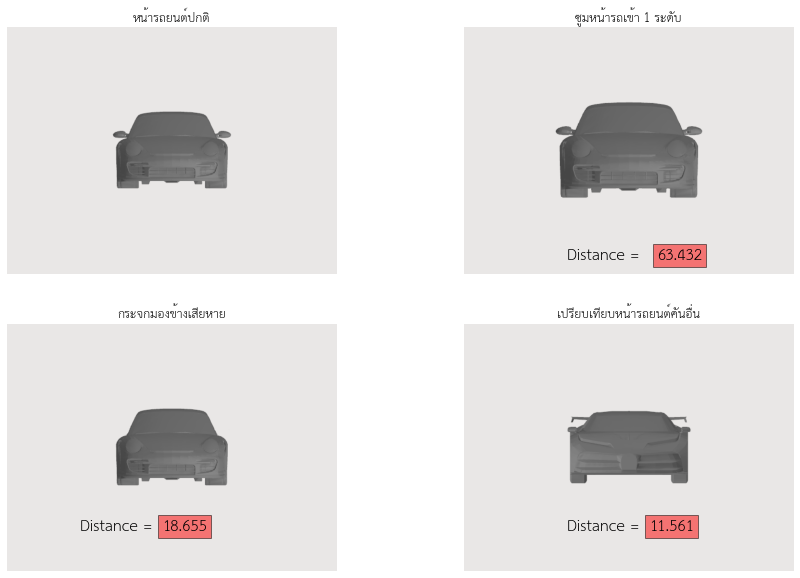

In [19]:
show_img(img1f,img1_1,img1_2,img1_3,tx1,tx2,tx3,tx4,id1)

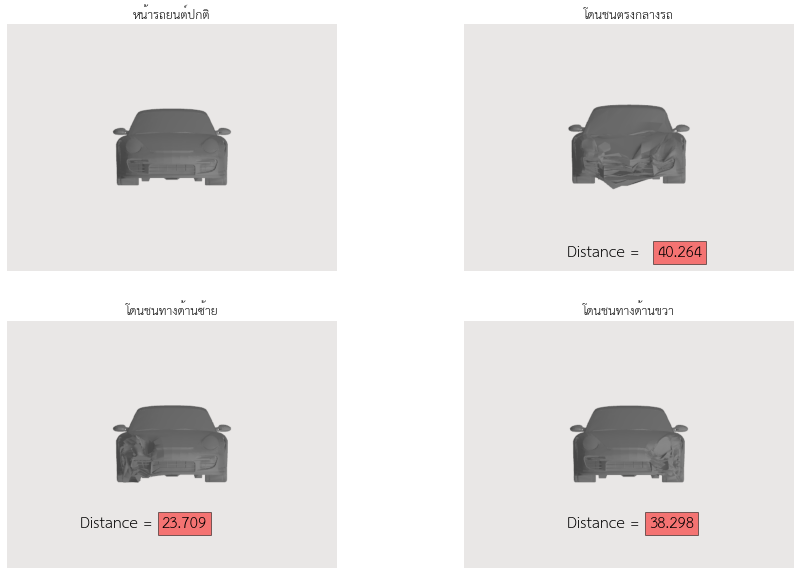

In [20]:
show_img2(img1f,img1_4,img1_5,img1_6,tx1,tx5,tx6,tx7,id1)

### ID2

In [21]:
img2f  = cv2.imread(r'/content/drive/MyDrive/3D_Model/Base_car/ID2/ID2/ID2F.png')
img2_1 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID2/ID2/ID2_1.png')
img2_2 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID2/ID2/ID2_2.png')
img2_3 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID2/ID2/ID2_3.png')
img2_4 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID2/ID2/ID2BC.png')
img2_5 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID2/ID2/ID2BL.png')
img2_6 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID2/ID2/ID2BR.png')

In [22]:
car2_dataset , car2_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Base_car/ID2')
dmg2_dataset , dmg2_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Car_view/ID2')

In [23]:
id2b = get_features(vgg,car2_loader)
id2v = get_features(vgg,dmg2_loader)

100%|██████████| 1/1 [00:00<00:00,  5.95it/s]


In [24]:
id2 = get_euclidean(id2b,id2v)
id2

[43.527469635009766,
 12.360145568847656,
 23.267335891723633,
 25.489639282226562,
 13.738062858581543,
 38.297428131103516]

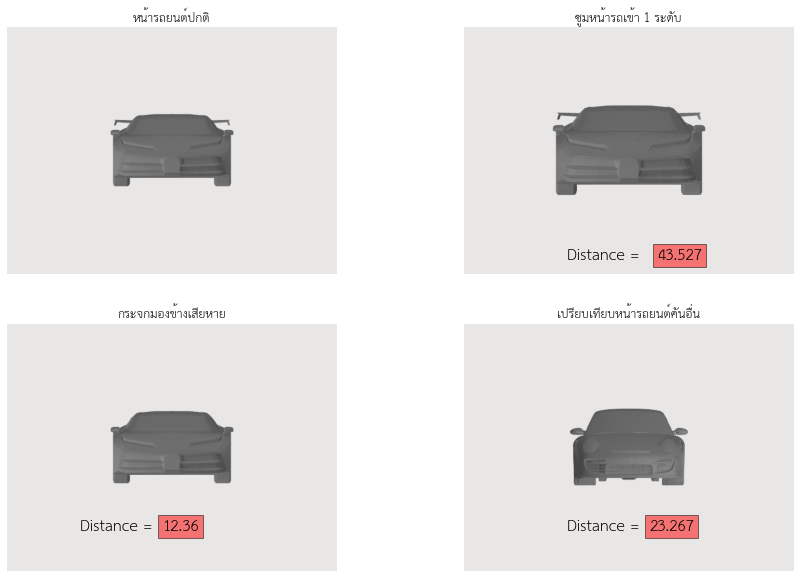

In [25]:
show_img(img2f,img2_1,img2_2,img2_3,tx1,tx2,tx3,tx4,id2)

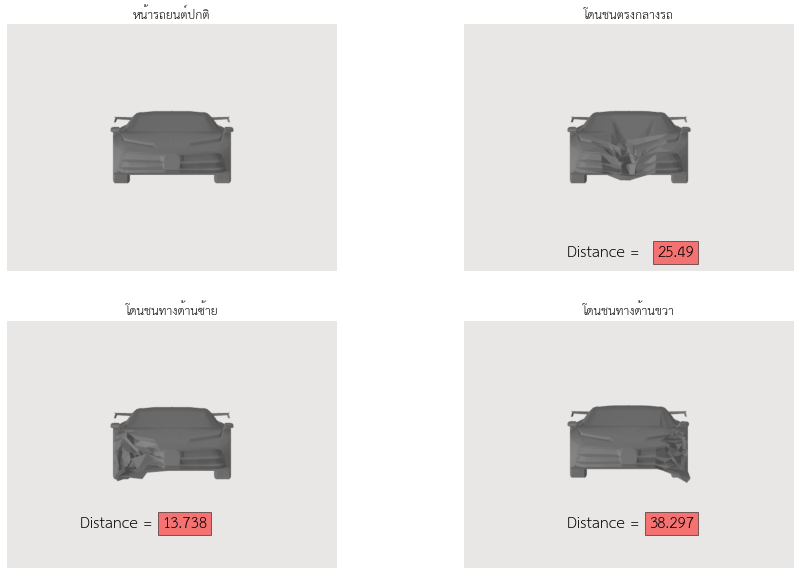

In [26]:
show_img2(img2f,img2_4,img2_5,img2_6,tx1,tx5,tx6,tx7,id2)

### ID3

In [27]:
img3f  = cv2.imread(r'/content/drive/MyDrive/3D_Model/Base_car/ID3/ID3/ID3F.png')
img3_1 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID3/ID3/ID3_1.png')
img3_2 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID3/ID3/ID3_2.png')
img3_3 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID3/ID3/ID3_3.png')
img3_4 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID3/ID3/ID3BC.png')
img3_5 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID3/ID3/ID3BL.png')
img3_6 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID3/ID3/ID3BR.png')

In [28]:
car3_dataset , car3_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Base_car/ID3')
dmg3_dataset , dmg3_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Car_view/ID3')

In [29]:
id3b = get_features(vgg,car3_loader)
id3v = get_features(vgg,dmg3_loader)

100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


In [30]:
id3 = get_euclidean(id3b,id3v)
id3

[38.22801208496094,
 14.019086837768555,
 5.338351249694824,
 46.4276123046875,
 41.78114318847656,
 49.730777740478516]

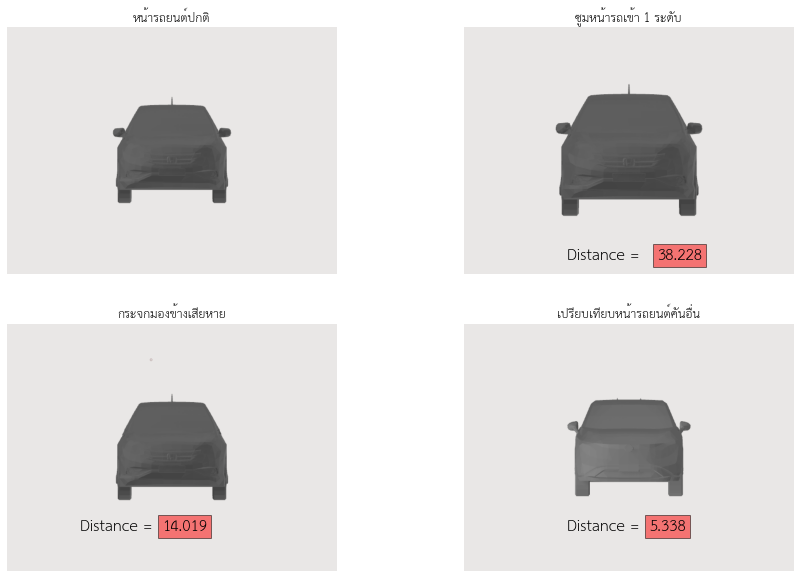

In [31]:
show_img(img3f,img3_1,img3_2,img3_3,tx1,tx2,tx3,tx4,id3)

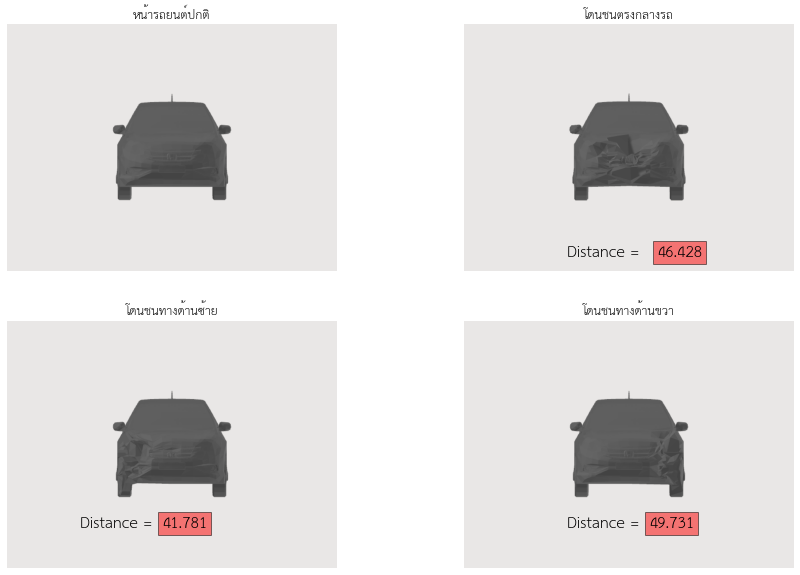

In [32]:
show_img2(img3f,img3_4,img3_5,img3_6,tx1,tx5,tx6,tx7,id3)

### ID4

In [33]:
img4f  = cv2.imread(r'/content/drive/MyDrive/3D_Model/Base_car/ID4/ID4/ID4F.png')
img4_1 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID4/ID4/ID4_1.png')
img4_2 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID4/ID4/ID4_2.png')
img4_3 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID4/ID4/ID4_3.png')
img4_4 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID4/ID4/ID4BC.png')
img4_5 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID4/ID4/ID4BL.png')
img4_6 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID4/ID4/ID4BR.png')

In [34]:
car4_dataset , car4_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Base_car/ID4')
dmg4_dataset , dmg4_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Car_view/ID4')

In [35]:
id4b = get_features(vgg,car4_loader)
id4v = get_features(vgg,dmg4_loader)

100%|██████████| 1/1 [00:00<00:00,  5.74it/s]


In [36]:
id4 = get_euclidean(id4b,id4v)
id4

[64.43775177001953,
 15.860223770141602,
 5.129775047302246,
 39.57441711425781,
 43.63166427612305,
 49.73152542114258]

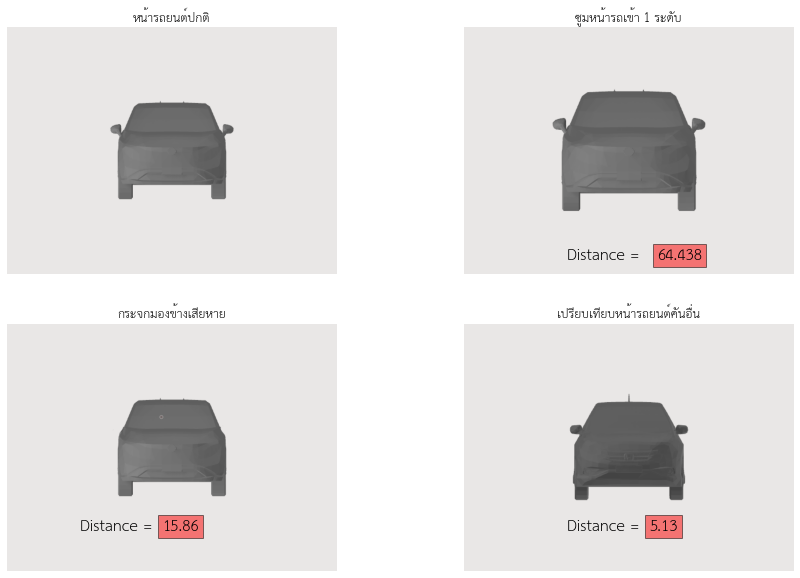

In [37]:
show_img(img4f,img4_1,img4_2,img4_3,tx1,tx2,tx3,tx4,id4)

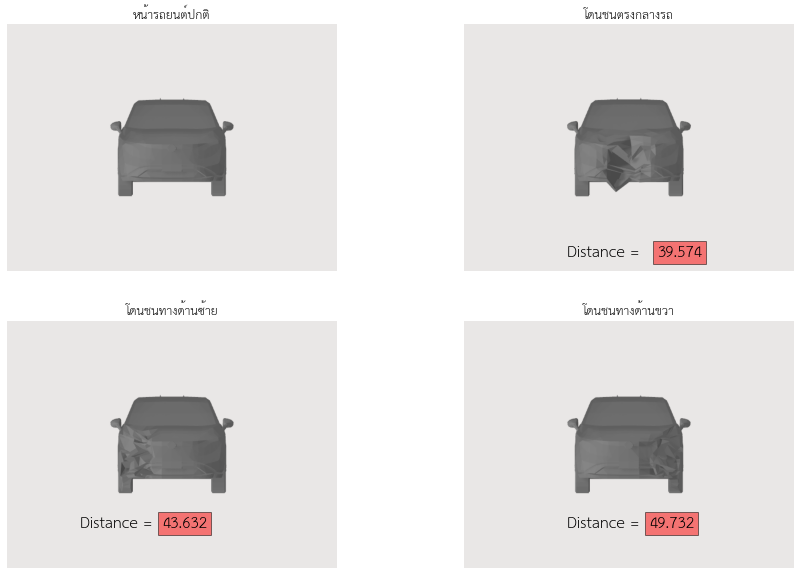

In [38]:
show_img2(img4f,img4_4,img4_5,img4_6,tx1,tx5,tx6,tx7,id4)

# เปรียบเทียบด้านหลังรถยนต์

In [39]:
txb1 = 'ด้านหลังรถยนต์ปกติ'
txb2 = 'โดนชนจากตรงกลาง'
txb3 = 'โดนชนทางด้านซ้าย'
txb4 = 'โดนชนทางด้านขวา'

## ID1


In [40]:
img1b   = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/base/ID1/ID1/ID1B.png')
img1bbc = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID1/ID1/ID1BBC.png')
img1bbl = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID1/ID1/ID1BBL.png')
img1bbr = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID1/ID1/ID1BBR.png')

In [41]:
car1b_dataset , car1b_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Back/base/ID1')
dmg1b_dataset , dmg1b_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Back/view/ID1')

In [42]:
id1bb = get_features(vgg,car1b_loader)
id1vb = get_features(vgg,dmg1b_loader)

100%|██████████| 1/1 [00:00<00:00,  6.87it/s]


In [43]:
id1b = get_euclidean(id1bb,id1vb)
id1b

[12.104191780090332, 6.991466999053955, 7.332461357116699]

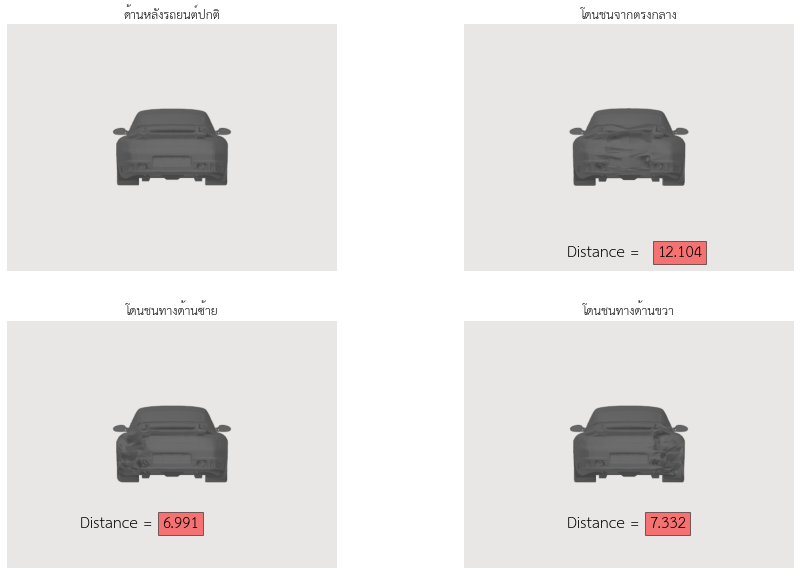

In [44]:
show_img(img1b,img1bbc,img1bbl,img1bbr,txb1,txb2,txb3,txb4,id1b)

## ID2

In [45]:
img2b   = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/base/ID2/ID2/ID2B.png')
img2bbc = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID2/ID2/ID2BBC.png')
img2bbl = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID2/ID2/ID2BBL.png')
img2bbr = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID2/ID2/ID2BBR.png')

In [46]:
car2b_dataset , car2b_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Back/base/ID2')
dmg2b_dataset , dmg2b_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Back/view/ID2')

In [47]:
id2bb = get_features(vgg,car2b_loader)
id2vb = get_features(vgg,dmg2b_loader)

100%|██████████| 1/1 [00:00<00:00,  6.84it/s]


In [48]:
id2b = get_euclidean(id2bb,id2vb)
id2b

[16.794198989868164, 14.476432800292969, 17.849843978881836]

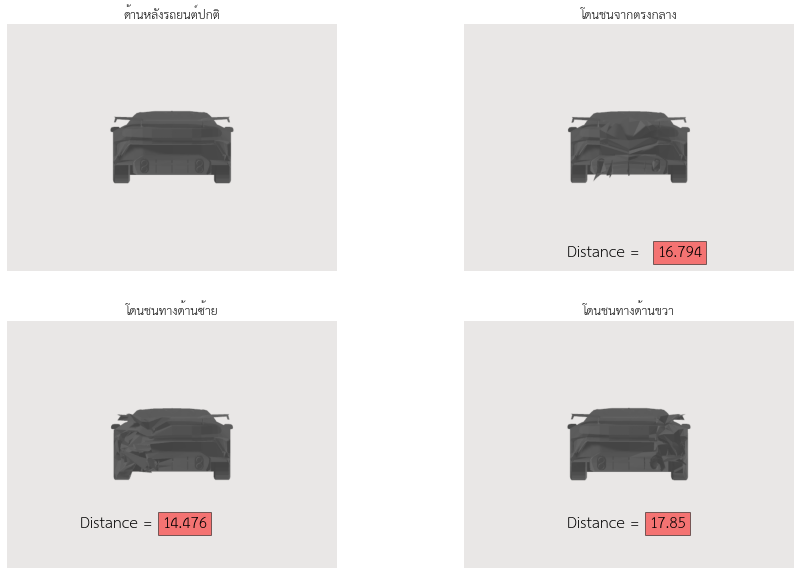

In [49]:
show_img(img2b,img2bbc,img2bbl,img2bbr,txb1,txb2,txb3,txb4,id2b)

## ID3

In [50]:
img3b   = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/base/ID3/ID3/ID3B.png')
img3bbc = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID3/ID3/ID3BBC.png')
img3bbl = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID3/ID3/ID3BBL.png')
img3bbr = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID3/ID3/ID3BBR.png')

In [51]:
car3b_dataset , car3b_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Back/base/ID3')
dmg3b_dataset , dmg3b_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Back/view/ID3')

In [52]:
id3bb = get_features(vgg,car3b_loader)
id3vb = get_features(vgg,dmg3b_loader)

100%|██████████| 1/1 [00:00<00:00,  6.76it/s]


In [53]:
id3b = get_euclidean(id3bb,id3vb)
id3b

[50.91754913330078, 27.25536346435547, 33.05148696899414]

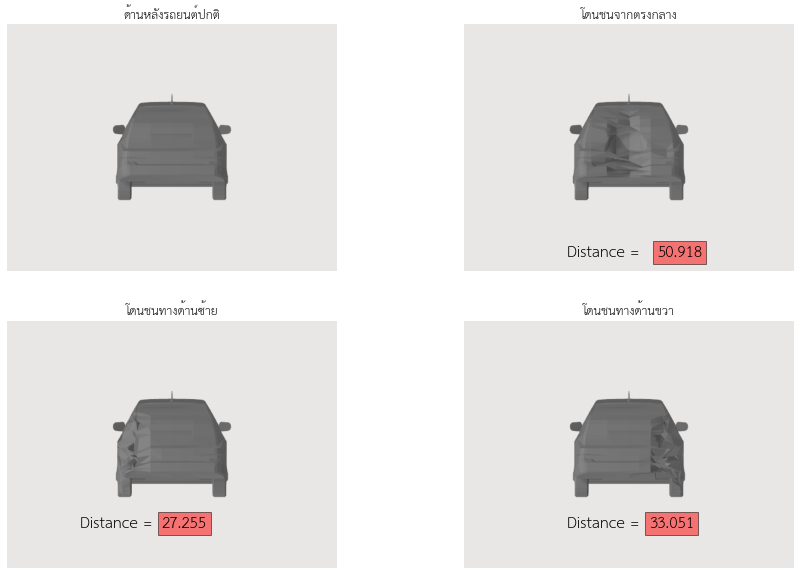

In [54]:
show_img(img3b,img3bbc,img3bbl,img3bbr,txb1,txb2,txb3,txb4,id3b)

## ID4

In [55]:
img4b   = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/base/ID4/ID4/ID4B.png')
img4bbc = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID4/ID4/ID4BBC.png')
img4bbl = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID4/ID4/ID4BBL.png')
img4bbr = cv2.imread(r'/content/drive/MyDrive/3D_Model/Back/view/ID4/ID4/ID4BBR.png')

In [56]:
car4b_dataset , car4b_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Back/base/ID4')
dmg4b_dataset , dmg4b_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Back/view/ID4')

In [57]:
id4bb = get_features(vgg,car4b_loader)
id4vb = get_features(vgg,dmg4b_loader)

100%|██████████| 1/1 [00:00<00:00,  6.52it/s]


In [58]:
id4b = get_euclidean(id4bb,id4vb)
id4b

[27.729721069335938, 7.346591949462891, 13.88793659210205]

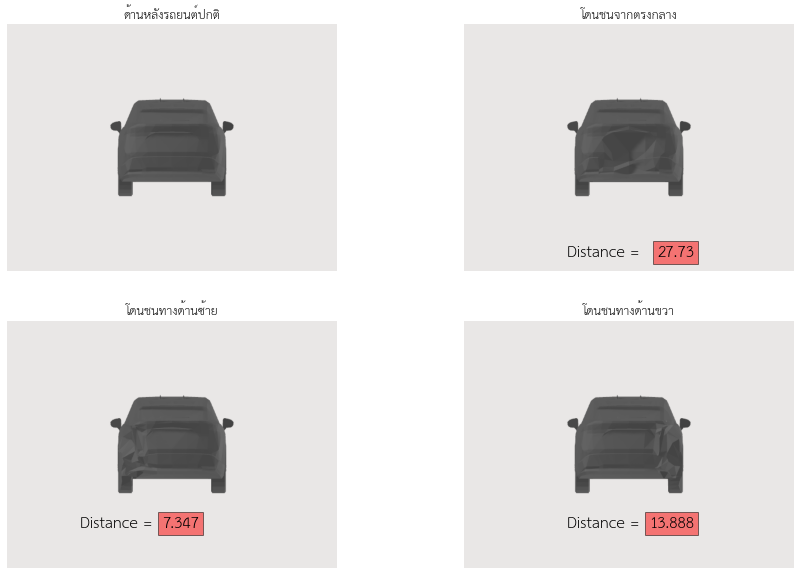

In [59]:
show_img(img4b,img4bbc,img4bbl,img4bbr,txb1,txb2,txb3,txb4,id4b)

# เปรียบเทียบด้านซ้ายของรถยนต์

## ID1

In [60]:
img1l   = cv2.imread(r'/content/drive/MyDrive/3D_Model/Left/Base/ID1/ID1/ID1L.png')
img1lbc = cv2.imread(r'/content/drive/MyDrive/3D_Model/Left/View/ID1/ID1/ID1LBC.png')
img1lbl = cv2.imread(r'/content/drive/MyDrive/3D_Model/Left/View/ID1/ID1/ID1LBL.png')
img1lbr = cv2.imread(r'/content/drive/MyDrive/3D_Model/Left/View/ID1/ID1/ID1LBR.png')

In [61]:
car1l_dataset , car1l_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Left/Base/ID1')
dmg1l_dataset , dmg1l_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Left/View/ID1')

In [62]:
id1bl = get_features(vgg,car1l_loader)
id1vl = get_features(vgg,dmg1l_loader)

100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


In [63]:
id1l = get_euclidean(id1bl,id1vl)
id1l

[11.638670921325684, 14.964877128601074, 7.060539245605469]

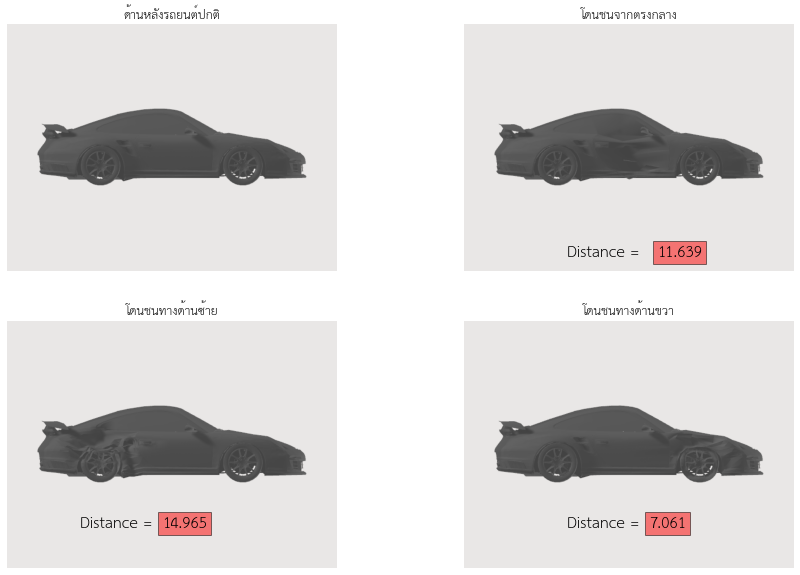

In [65]:
show_img(img1l,img1lbc,img1lbl,img1lbr,txb1,txb2,txb3,txb4,id1l)

## ID2

In [66]:
img2l   = cv2.imread(r'/content/drive/MyDrive/3D_Model/Left/Base/ID2/ID2/ID2L.png')
img2lbc = cv2.imread(r'/content/drive/MyDrive/3D_Model/Left/View/ID2/ID2/ID2LBC.png')
img2lbl = cv2.imread(r'/content/drive/MyDrive/3D_Model/Left/View/ID2/ID2/ID2LBL.png')
img2lbr = cv2.imread(r'/content/drive/MyDrive/3D_Model/Left/View/ID2/ID2/ID2LBR.png')

In [67]:
car2l_dataset , car2l_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Left/Base/ID2')
dmg2l_dataset , dmg2l_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Left/View/ID2')

In [68]:
id2bl = get_features(vgg,car2l_loader)
id2vl = get_features(vgg,dmg2l_loader)

100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


In [69]:
id2l = get_euclidean(id2bl,id2vl)
id2l

[24.43819808959961, 14.412660598754883, 14.603865623474121]

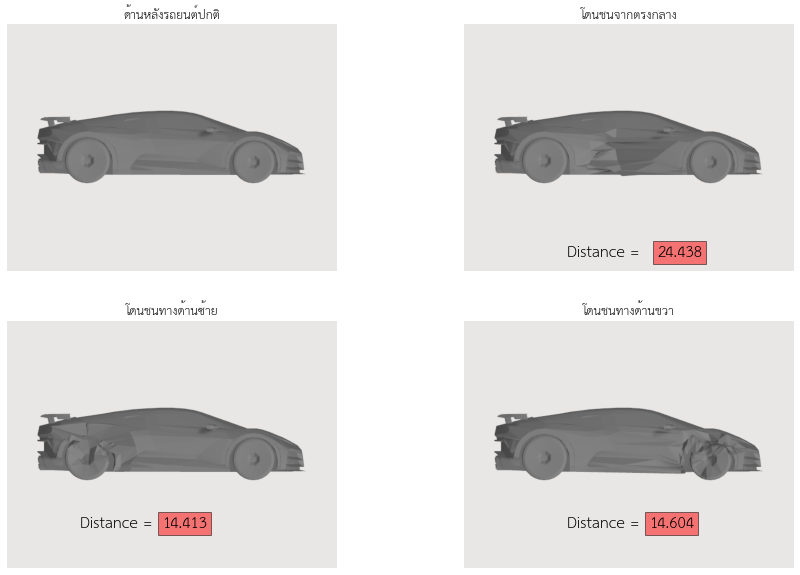

In [70]:
show_img(img2l,img2lbc,img2lbl,img2lbr,txb1,txb2,txb3,txb4,id2l)